In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./train/train.csv")

In [3]:
test_df = pd.read_csv("./test/test.csv")

In [4]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
train_df = pd.read_csv("./train/train.csv")

In [6]:
train_df.Product_Category_3.fillna(0,inplace=True)
train_df.Product_Category_2.fillna(0,inplace=True)
train_df.Product_Category_1.fillna(0,inplace=True)

In [7]:
convert_data = ['Gender' , 'Product_ID','Age', 'Occupation', 'City_Category', 'User_ID', 'Marital_Status','Stay_In_Current_City_Years']
def convertData(df,convert_data):
    for i in convert_data:
        df[i] = df[i].astype("category")
convertData(train_df,convert_data)
convertData(test_df,convert_data)
train_df.Product_Category_3=train_df.Product_Category_3.astype('int64')
train_df.Product_Category_2=train_df.Product_Category_2.astype('int64')


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          550068 non-null  int64   
 10  Product_Category_3          550068 non-null  int64   
 11  Purchase                    550068 non-null  int64   
dtypes: category(8), int64(4)
memory usage: 22.4 MB


In [9]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [10]:
train_df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2
top,1001680,P00265242,M,26-35,4,B,1,0
freq,1026,1880,414259,219587,72308,231173,193821,324731


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Giới tính nào nhiều hơn

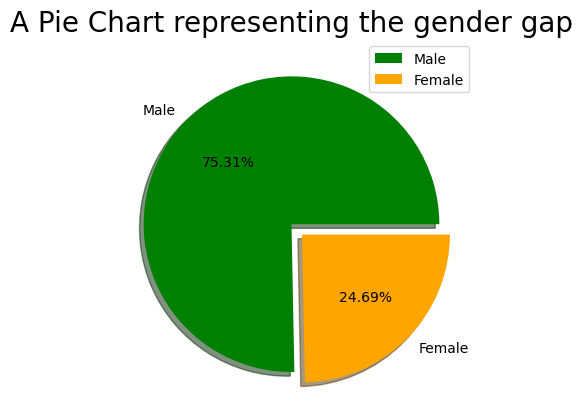

In [12]:
labels = ['Male', 'Female']
colors = ['Green', 'Orange']
explode = [0, 0.1]
size_g = train_df['Gender'].value_counts()
plt.pie(size_g, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

# Người nam nhiều hơn nữ

# Khoảng tuổi nào nhiều hơn

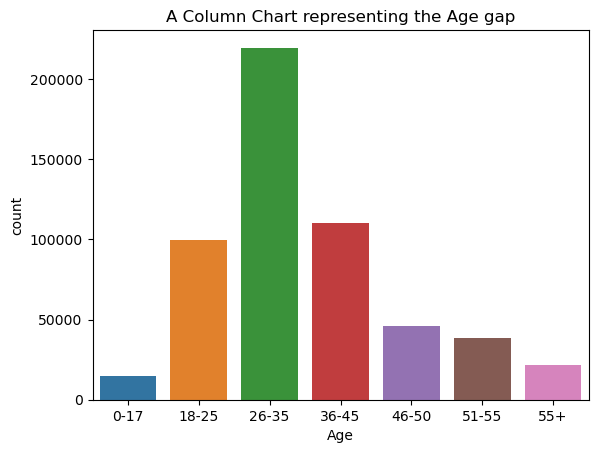

In [19]:

sns.countplot(data=train_df,x='Age').set(title='A Column Chart representing the Age gap');

In [ ]:
# Có thể thấy nhóm tuổi 26-35 có nhiều người nhất

# Nhóm nghề nào nhiều hơn

[Text(0.5, 1.0, 'A Bar Chart representing the Occupation gap')]

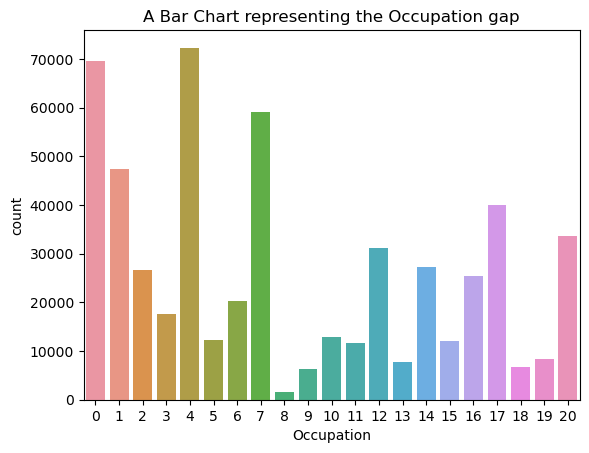

In [16]:
sns.countplot(data=train_df,x='Occupation').set(title='A Bar Chart representing the Occupation gap')

# Nhóm ngành 0 và 4 có nhiều người nhất

# Thành phố nào nhiều hơn

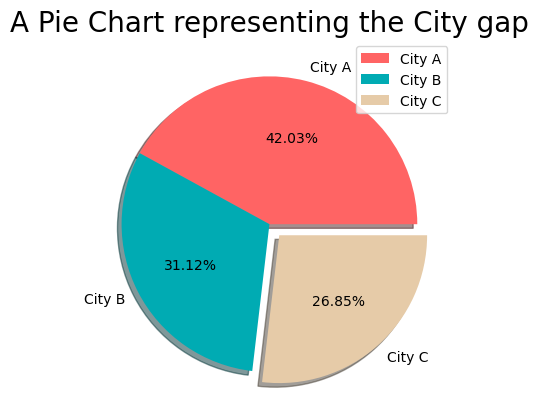

In [17]:
labels = ['City A', 'City B','City C']
colors = ['#FF6464', '#00ABB3','#E6CBA8']
explode = [0, 0,0.1]
size_g = train_df['City_Category'].value_counts()
plt.pie(size_g, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the City gap', fontsize = 20)
plt.legend()
plt.show()

# Giới tính ảnh hưởng thế nào đến việc mua

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

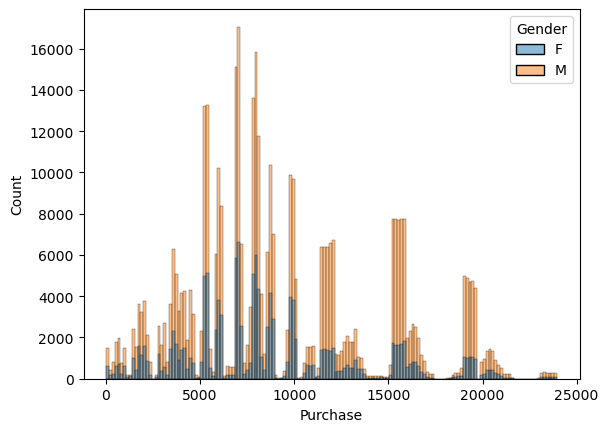

In [18]:
sns.histplot(data=train_df,x="Purchase",hue="Gender")

# Tình trạng hôn nhân ảnh hướng thế nào đến việc mua

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

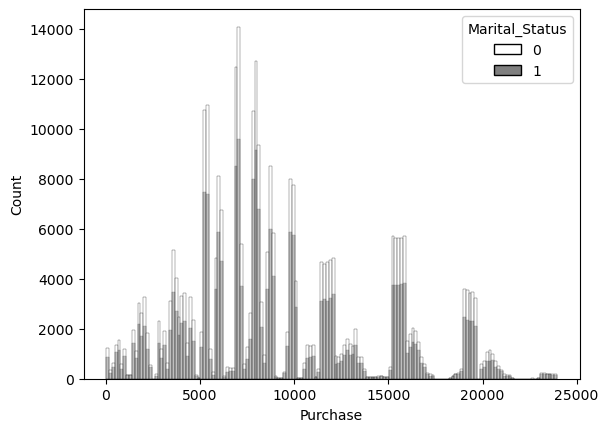

In [35]:
c = ['#FFFFFF', '#000000']
sns.histplot(data=train_df,x="Purchase",hue="Marital_Status",palette=c)

# Số lượng người mua của các nhóm tuổi, số tiền mua mỗi cá nhân

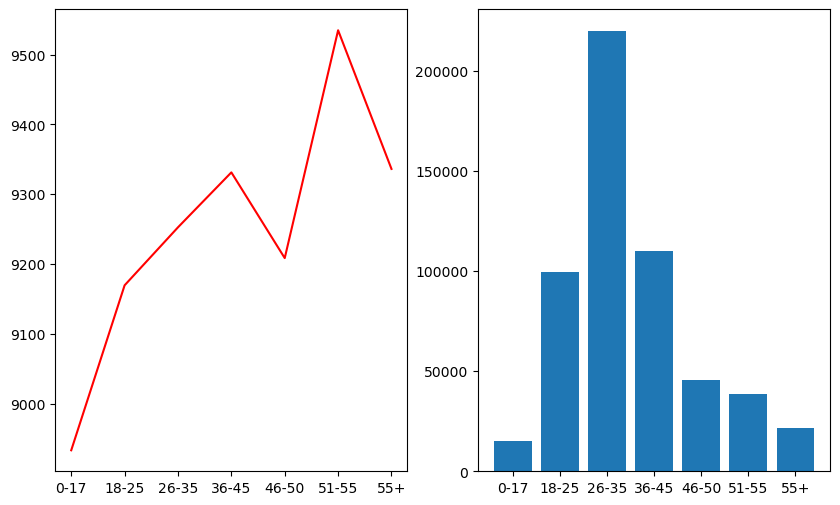

In [21]:
x=train_df.groupby("Age")["Purchase"].sum()
# x=x.to_list()
x=x.to_dict()
y= train_df['Age'].value_counts(sort=False)
y=y.to_dict()
mean={}
for i in x.keys():
    if i in y.keys():
        mean.update({i:x.get(i)/y.get(i)})
xl=[]
yl=[]
for et in mean.keys():
    xl.append(et)
for et in mean.values():
    yl.append(et)
fig,(ax1,ax2)=plt.subplots(figsize=(10,6),ncols=2,nrows=1)
ax1.plot(xl,yl,color='Red');
ax2.bar(y.keys(),y.values());




# Số lượng trong 1 ngành và số tiền 1 cá nhân bỏ ra 

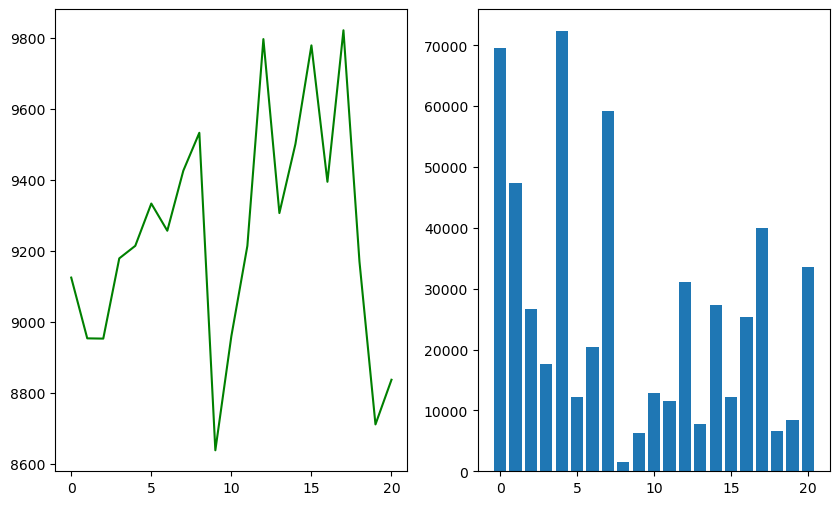

In [22]:
x=train_df.groupby("Occupation")["Purchase"].sum()
# x=x.to_list()
x=x.to_dict()
y= train_df['Occupation'].value_counts()
y=y.to_dict()
mean={}
for i in x.keys():
    if i in y.keys():
        mean.update({i:x.get(i)/y.get(i)})
xl=[]
yl=[]
for et in mean.keys():
    xl.append(et)
for et in mean.values():
    yl.append(et)
fig,(ax1,ax2)=plt.subplots(figsize=(10,6),ncols=2,nrows=1)
ax1.plot(xl,yl,color='Green');
xb=train_df['Occupation'].value_counts(sort=False)
xb = xb.to_dict()
ax2.bar(xb.keys(),xb.values());

# Việc sống ở thành phố nào và số tiền mua trung bình 1 người của thành phố đó

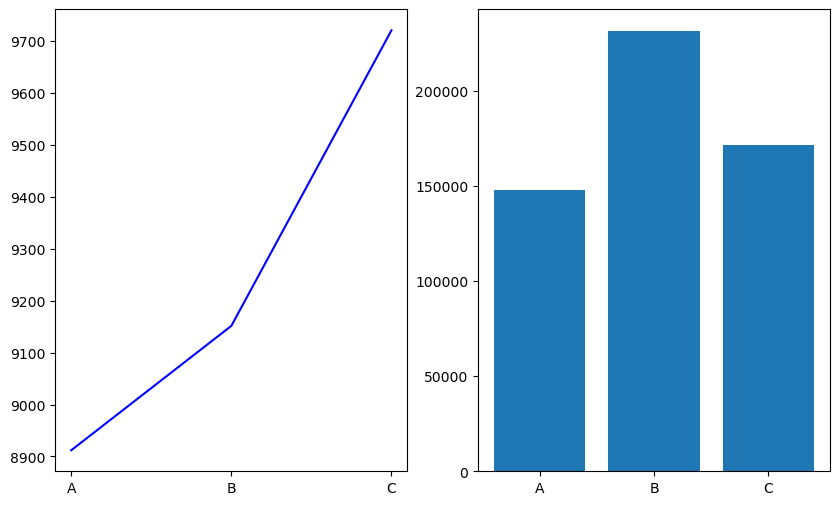

In [23]:
x=train_df.groupby("City_Category")["Purchase"].sum()
# x=x.to_list()
x=x.to_dict()
y= train_df['City_Category'].value_counts()
y=y.to_dict()
mean={}
for i in x.keys():
    if i in y.keys():
        mean.update({i:x.get(i)/y.get(i)})
xl=[]
yl=[]
for et in mean.keys():
    xl.append(et)
for et in mean.values():
    yl.append(et)
fig,(ax1,ax2)=plt.subplots(figsize=(10,6),ncols=2,nrows=1)
ax1.plot(xl,yl,color='Blue');
xb=train_df['City_Category'].value_counts(sort=False)
xb = xb.to_dict()
ax2.bar(xb.keys(),xb.values());
#sort_value

- Thành phố B có số người nhiều nhất nhưng, Thành phố C mới chi nhiều nhất

# Giới tính với tình trạng hôn nhân ảnh hưởng thế nào đến purchase

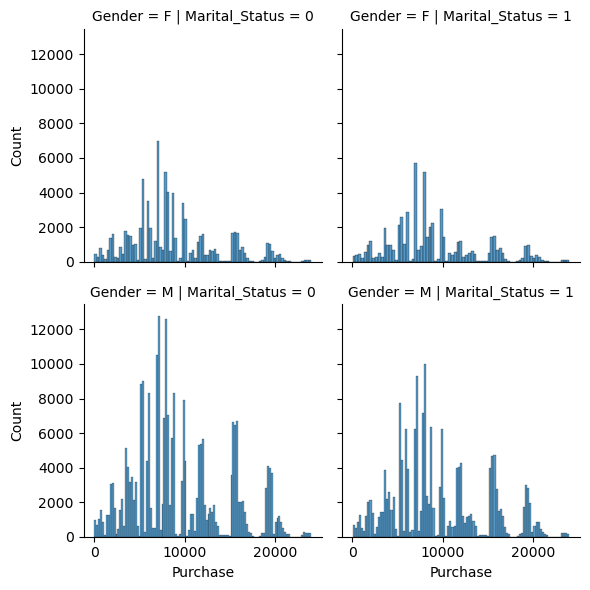

In [48]:
train_dfg = sns.FacetGrid(data=train_df,row ="Gender",col ="Marital_Status")
train_dfg.map(sns.histplot,'Purchase');

- Những người chưa lập gia đình sẽ có số lượng nhiều hơn và mua sắm nhiều hơn

# Sống ở thành phố nào và công việc gì ảnh hưởng tới việc mua

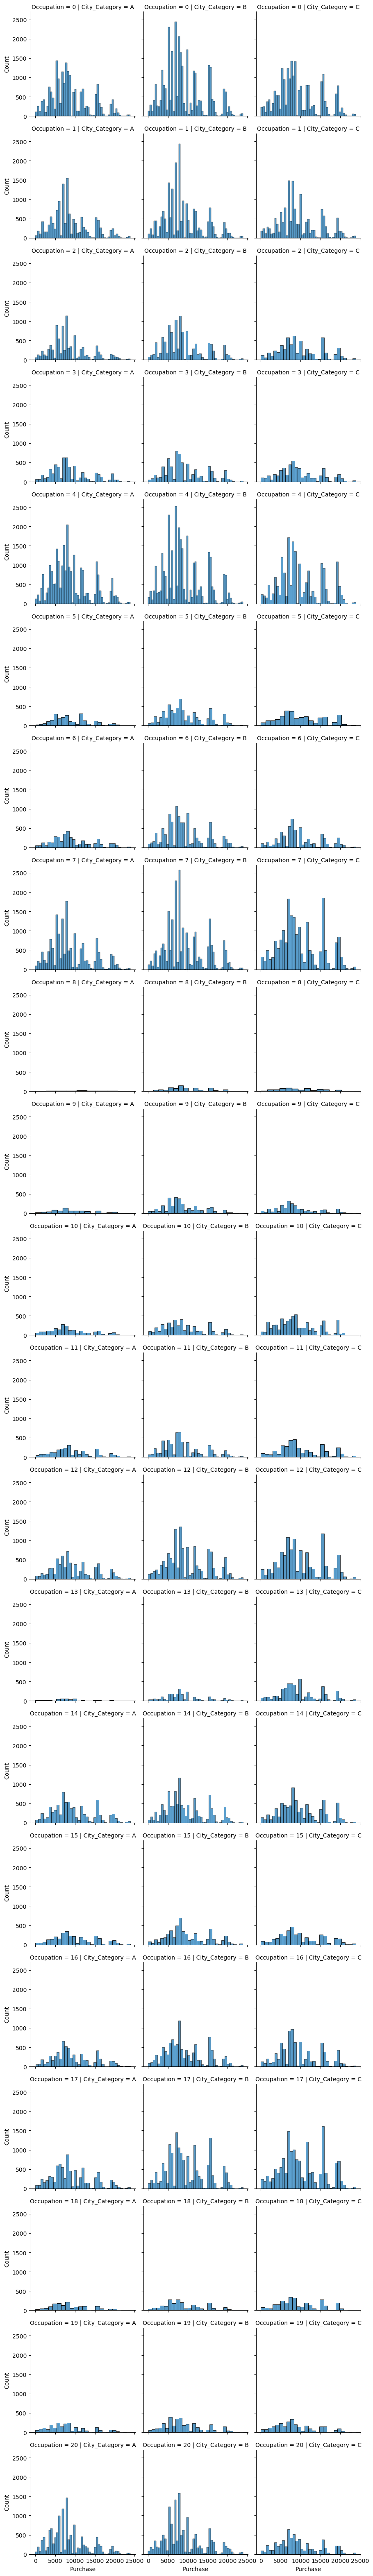

In [49]:
train_dfg = sns.FacetGrid(data=train_df,row ="Occupation",col ="City_Category")
train_dfg.map(sns.histplot,'Purchase');

In [ ]:
- Thành phố B có nhiều người lao động hơn.

<AxesSubplot:>

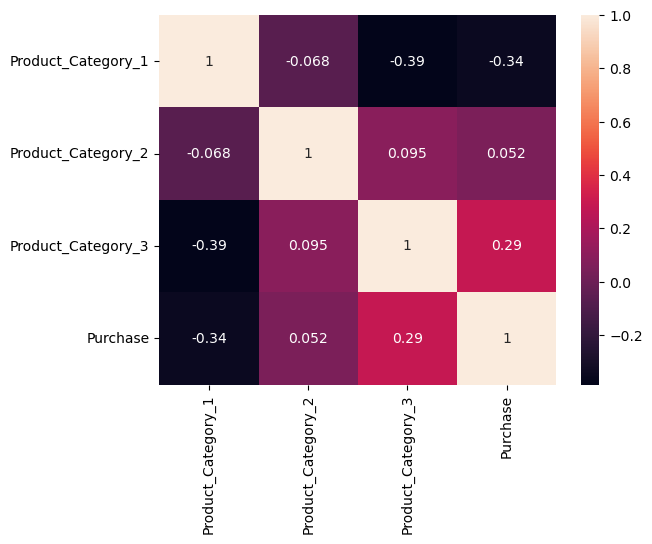

In [278]:
sns.heatmap(train_df.corr(),annot=True)

- Thành phố nào và mua sản phẩm gì nhiều(số lượng bao nhiều)
- Nhóm tuổi nào thích mua sản phẩm nào-purchase
- giới tính thích mua sản phẩm nào-purchase
- Độ tuổi thích mua sản phẩm nào-purchase

# Các nhu cầu mua loại sản phẩm của các thành phố

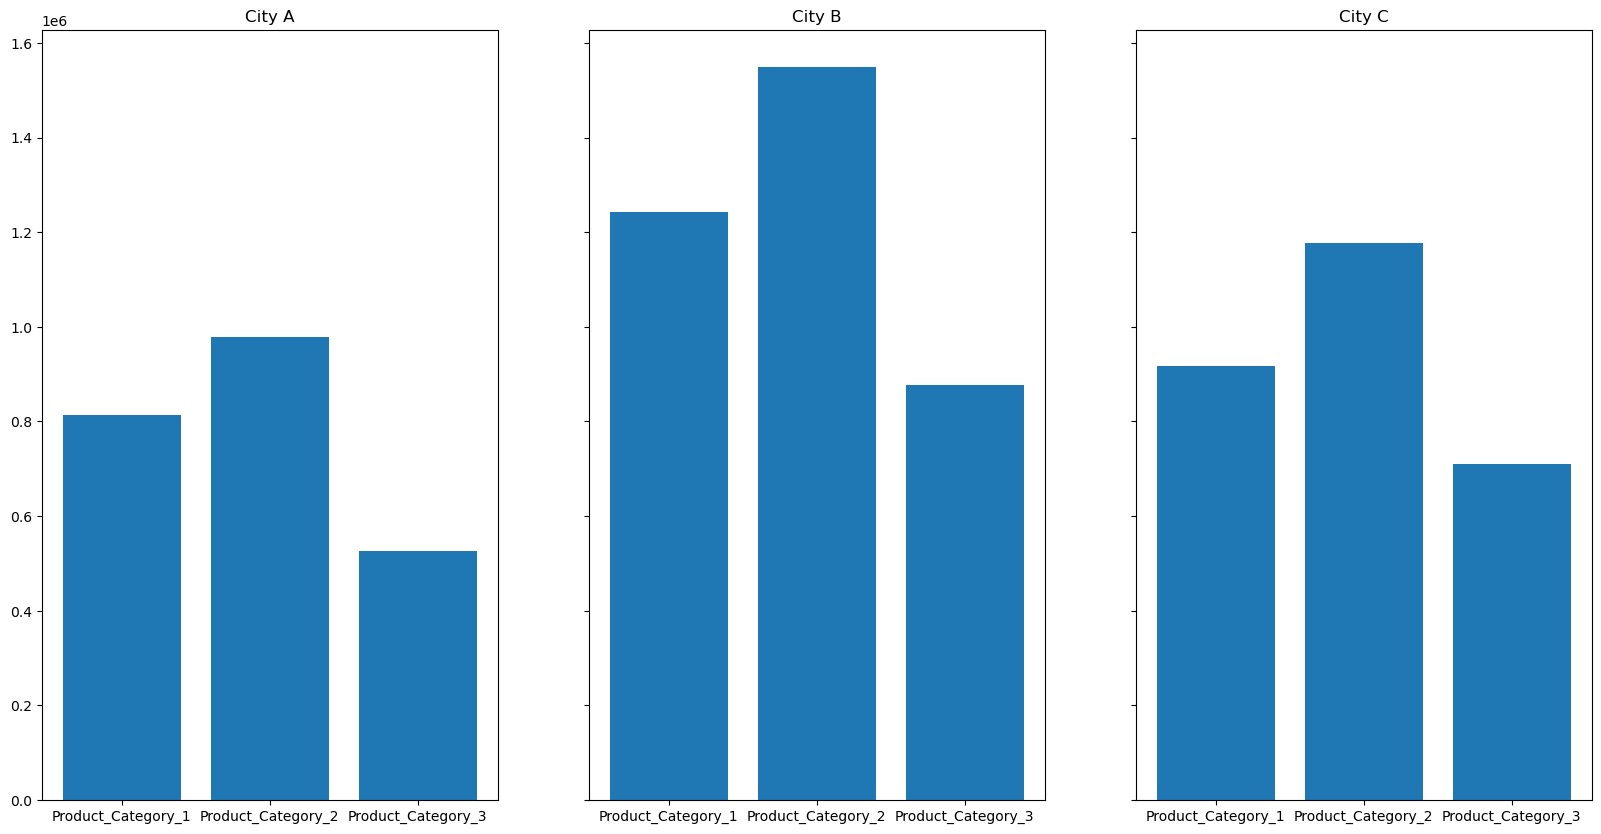

In [39]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(20,10),ncols=3,nrows=1,sharey=True)

city_cate = ['Product_Category_1','Product_Category_2','Product_Category_3']
count_quantity = x=train_df.groupby("City_Category")[city_cate].sum()
ax1.bar(city_cate,count_quantity.iloc[0,:]);
ax1.title.set_text('City A')
ax2.bar(city_cate,count_quantity.iloc[1,:]);
ax2.title.set_text('City B')
ax3.bar(city_cate,count_quantity.iloc[2,:]);
ax3.title.set_text('City C')

- Sản phẩm loại 2 có nhiều người nhu cầu mua nhất

# Nhu cầu mua các loại sản phẩm ở các nhóm tuổi

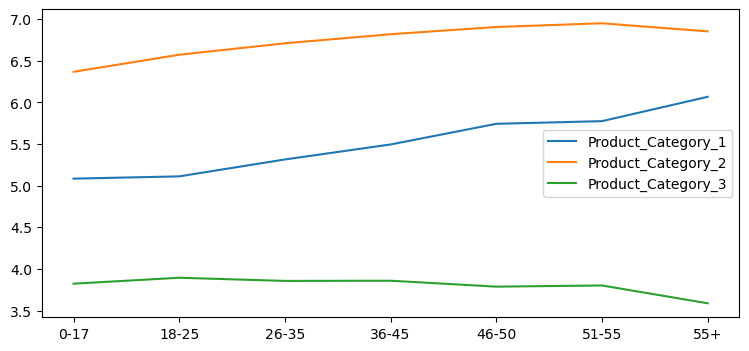

In [47]:
fig,(ax1)=plt.subplots(figsize=(9,4),ncols=1,nrows=1)
city_cate = ['Product_Category_1','Product_Category_2','Product_Category_3']
count_quantity = x=train_df.groupby("Age")[city_cate].sum()
count_age = train_df['Age'].value_counts()
count_age = count_age.to_dict()
total_quanti = count_quantity.iloc[:,0].to_dict()
total_quanti
percent_of_age ={}
for age in total_quanti.keys():
    if age in count_age.keys():
        percent_of_age.update({age:total_quanti.get(age)/count_age.get(age)})
    
percent_of_age
# train_df.iloc[:,3].unique()
ax1.plot(percent_of_age.keys(),percent_of_age.values(),label="Product_Category_1");
total_quanti = count_quantity.iloc[:,1].to_dict()
total_quanti
percent_of_age ={}
for age in total_quanti.keys():
    if age in count_age.keys():
        percent_of_age.update({age:total_quanti.get(age)/count_age.get(age)})
    
percent_of_age
# train_df.iloc[:,3].unique()
ax1.plot(percent_of_age.keys(),percent_of_age.values(),label="Product_Category_2");

total_quanti = count_quantity.iloc[:,2].to_dict()
total_quanti
percent_of_age ={}
for age in total_quanti.keys():
    if age in count_age.keys():
        percent_of_age.update({age:total_quanti.get(age)/count_age.get(age)})
    
percent_of_age
# train_df.iloc[:,3].unique()
ax1.plot(percent_of_age.keys(),percent_of_age.values(),label="Product_Category_3");
#legend
plt.legend();

- Những người mua sản phẩm loại 3 thì có xu hướng là người trẻ
- Sản phẩm loại 1 và 2 có xu hướng tỉ lệ với độ tuổi

# Tình trạng hôn nhân và giới tình ảnh hướng tới việc mua các sản phẩm

In [20]:
city_cate = ['Product_Category_1','Product_Category_2','Product_Category_3']
list_cate = ["Gender","Marital_Status"]
train_df.groupby(list_cate)[city_cate].sum()

Product_Category_1  Product_Category_2  \
Gender Marital_Status                                           
F      0                           446585              531831   
       1                           329932              384308   
M      0                          1287173             1653526   
       1                           909026             1135283   

                       Product_Category_3  
Gender Marital_Status                      
F      0                           273056  
       1                           195123  
M      0                           982369  
       1                           662781

- Những người đàn ông chưa lập gia đình có nhu cầu mua sắm cao và nhiều nhất là sản phẩm loại 2